# Introducción

Nuestro enfoque en este proyecto es ayudar a la empresa OilyGiant a encontrar la mejor ubicación para abrir 200 pozos nuevos de petróleo en base a muestras de crudo de tres regiones, para ello crearé un modelo que ayudará a elegir la región con el mayor margen de beneficio y utilizaré la técnica Bootstrapping para analizar posibles beneficios y riesgos.

# Importación de Librerías y Datos

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

# Exploración Inicial de Datos

En la siguiente sección luego de haber cargado las librerías necesarias y de haber importado los datos, procederé a hacer un análisis exploratorio inicial para cada base de datos en cada región.

In [25]:
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [26]:
df0.info()
print('Number of duplicates:', df0.duplicated().sum())
df0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Number of duplicates: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [27]:
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [28]:
df1.info()
print('Number of duplicates:', df1.duplicated().sum())
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Number of duplicates: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [29]:
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [30]:
df2.info()
print('Number of duplicates:', df1.duplicated().sum())
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Number of duplicates: 0


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


# Comparación entre regiones

En la siguiente sección trazaré un gráfico para poder visualizar las diferencias entre las regiones.

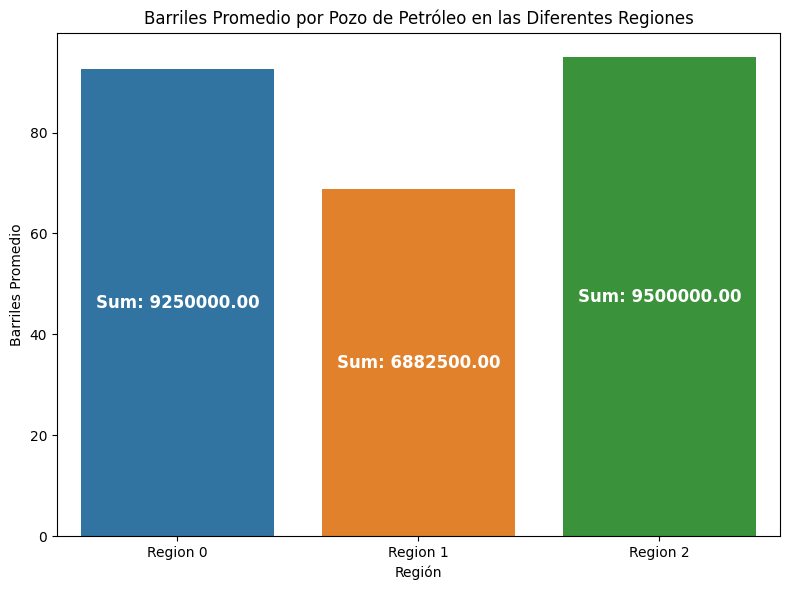

In [31]:
mean_data = pd.DataFrame({
    'Region': ['Region 0', 'Region 1', 'Region 2'],
    'Barriles promedio': [df0['product'].mean(), df1['product'].mean(), df2['product'].mean()],
    'Suma total de barriles': [df0['product'].sum(), df1['product'].sum(), df2['product'].sum()]
})

plt.figure(figsize=(8, 6))

sns.barplot(x='Region', y='Barriles promedio', data=mean_data)

for i, total_sum in enumerate(mean_data['Suma total de barriles']):
    plt.text(i, mean_data.iloc[i]['Barriles promedio']/2, f'Sum: {total_sum:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.title('Barriles Promedio por Pozo de Petróleo en las Diferentes Regiones')
plt.xlabel('Región')
plt.ylabel('Barriles Promedio')

plt.tight_layout()
plt.show()

Mediante el gráfico anterior se puede observar la diferencia en producción de barriles de las tres regiones, notanto que la región 2 es la que mas produce, seguida de la región 0 por muy poco y la región 1 se queda algo por debajo de las otra dos en último lugar en este aspecto.

# Limpieza de datos

Esta sección es de limpieza de los datos para evitar problemas en el código sin embargo, en base al análisis exploratorio previo pude observar que al parecer no hace falta hacer un  cambio mayor ya que todo parece estar bien para proceder al siguiente paso sólo antes de eso comprobaré si los tipos de datos aparecen correctamente en todas las filas.

In [32]:
non_numeric_values_df0 = df0.apply(pd.to_numeric, errors='coerce').isna().sum()
non_numeric_values_df0 = non_numeric_values_df0[non_numeric_values_df0 > 0]

non_numeric_values_df1 = df1.apply(pd.to_numeric, errors='coerce').isna().sum()
non_numeric_values_df1 = non_numeric_values_df1[non_numeric_values_df1 > 0]

non_numeric_values_df2 = df2.apply(pd.to_numeric, errors='coerce').isna().sum()
non_numeric_values_df2 = non_numeric_values_df2[non_numeric_values_df2 > 0]

print("Valores no numéricos en df0:")
print(non_numeric_values_df0)

print("\nValores no numéricos en df1:")
print(non_numeric_values_df1)

print("\nValores no numéricos en df2:")
print(non_numeric_values_df2)

Valores no numéricos en df0:
id    99980
dtype: int64

Valores no numéricos en df1:
id    99988
dtype: int64

Valores no numéricos en df2:
id    99986
dtype: int64


Al parecer está bien, la única columna con valores de string es la de ID lo cual no me parece un problema ya que este campo identifica los nombres de los pozos petroleros por eso me parece normal y entonces continuaré con el proceso.

# División de datos en conjuntos de entrenamiento y validación

En esta sección para garantizar una adecuada división de los datos y evaluar correctamente el rendimiento del modelo realizaré la separación en una proporción del 75% para el conjunto de entrenamiento y del 25% para el conjunto de validación por separado para cada región.

In [33]:
df0_train, df0_valid = train_test_split(df0, test_size=0.25, random_state=42)
df1_train, df1_valid = train_test_split(df1, test_size=0.25, random_state=42)
df2_train, df2_valid = train_test_split(df2, test_size=0.25, random_state=42)


df0_features_train = df0_train.drop("product", axis=1)
df0_target_train = df0_train["product"]
df0_features_valid = df0_valid.drop("product", axis=1)
df0_target_valid = df0_valid["product"]


df1_features_train = df1_train.drop("product", axis=1)
df1_target_train = df1_train["product"]
df1_features_valid = df1_valid.drop("product", axis=1)
df1_target_valid = df1_valid["product"]


df2_features_train = df2_train.drop("product", axis=1)
df2_target_train = df2_train["product"]
df2_features_valid = df2_valid.drop("product", axis=1)
df2_target_valid = df2_valid["product"]

print("Tamaño de los conjuntos de entrenamiento:")
print()
print("df0_features_train:", len(df0_features_train))
print("df0_target_train:", len(df0_target_train))
print()
print("df1_features_train:", len(df1_features_train))
print("df1_target_train:", len(df1_target_train))
print()
print("df2_features_train:", len(df2_features_train))
print("df2_target_train:", len(df2_target_train))
print()
print()
print("Size of validation sets:")
print()
print("df0_features_valid:", len(df0_features_valid))
print("df0_target_valid:", len(df0_target_valid))
print()
print("df1_features_valid:", len(df1_features_valid))
print("df1_target_valid:", len(df1_target_valid))
print()
print("df2_features_valid:", len(df2_features_valid))
print("df2_target_valid:", len(df2_target_valid))

Tamaño de los conjuntos de entrenamiento:

df0_features_train: 75000
df0_target_train: 75000

df1_features_train: 75000
df1_target_train: 75000

df2_features_train: 75000
df2_target_train: 75000


Size of validation sets:

df0_features_valid: 25000
df0_target_valid: 25000

df1_features_valid: 25000
df1_target_valid: 25000

df2_features_valid: 25000
df2_target_valid: 25000


# Modelo de capacitación y pruebas para cada región

En el siguiente paso se evaluarán y analizarán modelos de regresión lineal y sus resultados utilizando los DataFrames df0, df1 y df2, de esta forma podré observar cómo se comportan para ayudar a elegir la región con mayor margen de beneficio.

# Entrenamiento y evaluación de los modelos de las regiones

# Regresión lineal para df0

In [34]:
model_lr_0 = LinearRegression()

model_lr_0.fit(df0_features_train.drop("id", axis=1), df0_target_train)

predictions_lr_0 = model_lr_0.predict(df0_features_valid.drop("id", axis=1))

mse_lr_0 = mean_squared_error(df0_target_valid, predictions_lr_0)
rmse_lr_0 = np.sqrt(mse_lr_0)
r2_lr_0 = r2_score(df0_target_valid, predictions_lr_0)

print("Regresión lineal - Región 0")
print("MSE:", mse_lr_0)
print("RMSE:", rmse_lr_0)
print("Puntaje R2:", r2_lr_0)
average_predicted_volume_0 = predictions_lr_0.mean()
average_validation_volume_0 = df0_target_valid.mean()
print("Volumen promedio previsto - Región 0:", average_predicted_volume_0)
print("Volumen promedio del conjunto de validación - Región 0:", average_validation_volume_0)

Regresión lineal - Región 0
MSE: 1425.5608700093808
RMSE: 37.756600350261685
Puntaje R2: 0.2728287328173472
Volumen promedio previsto - Región 0: 92.3987999065777
Volumen promedio del conjunto de validación - Región 0: 92.32595637084387


# Regresión lineal para df1

In [35]:
model_lr_1 = LinearRegression()

model_lr_1.fit(df1_features_train.drop("id", axis=1), df1_target_train)

predictions_lr_1 = model_lr_1.predict(df1_features_valid.drop("id", axis=1))

mse_lr_1 = mean_squared_error(df1_target_valid, predictions_lr_1)
rmse_lr_1 = np.sqrt(mse_lr_1)
r2_lr_1 = r2_score(df1_target_valid, predictions_lr_1)

print("Regresión lineal - Región 1")
print("MSE:", mse_lr_1)
print("RMSE:", rmse_lr_1)
print("Puntaje R2:", r2_lr_1)
average_predicted_volume_1 = predictions_lr_1.mean()
average_validation_volume_1 = df1_target_valid.mean()
print("Volumen promedio previsto - Región 1:", average_predicted_volume_1)
print("Volumen promedio del conjunto de validación - Región 1:", average_validation_volume_1)

Regresión lineal - Región 1
MSE: 0.7925986566392013
RMSE: 0.890280100102884
Puntaje R2: 0.9996245232002449
Volumen promedio previsto - Región 1: 68.71287803913762
Volumen promedio del conjunto de validación - Región 1: 68.72538074722745


# Regresión lineal para df2

In [36]:
model_lr_2 = LinearRegression()

model_lr_2.fit(df2_features_train.drop("id", axis=1), df2_target_train)

predictions_lr_2 = model_lr_2.predict(df2_features_valid.drop("id", axis=1))

mse_lr_2 = mean_squared_error(df2_target_valid, predictions_lr_2)
rmse_lr_2 = np.sqrt(mse_lr_2)
r2_lr_2 = r2_score(df2_target_valid, predictions_lr_2)

print("Regresión lineal - Región 2")
print("MSE:", mse_lr_2)
print("RMSE:", rmse_lr_2)
print("Puntaje R2:", r2_lr_2)
average_predicted_volume_2 = predictions_lr_2.mean()
average_validation_volume_2 = df2_target_valid.mean()
print("Volumen promedio previsto - Región 2:", average_predicted_volume_2)
print("Volumen promedio del conjunto de validación - Región 2:", average_validation_volume_2)

Regresión lineal - Región 2
MSE: 1611.6910636385905
RMSE: 40.14587231134218
Puntaje R2: 0.19634705977280464
Volumen promedio previsto - Región 2: 94.77102387765939
Volumen promedio del conjunto de validación - Región 2: 95.15099907171961


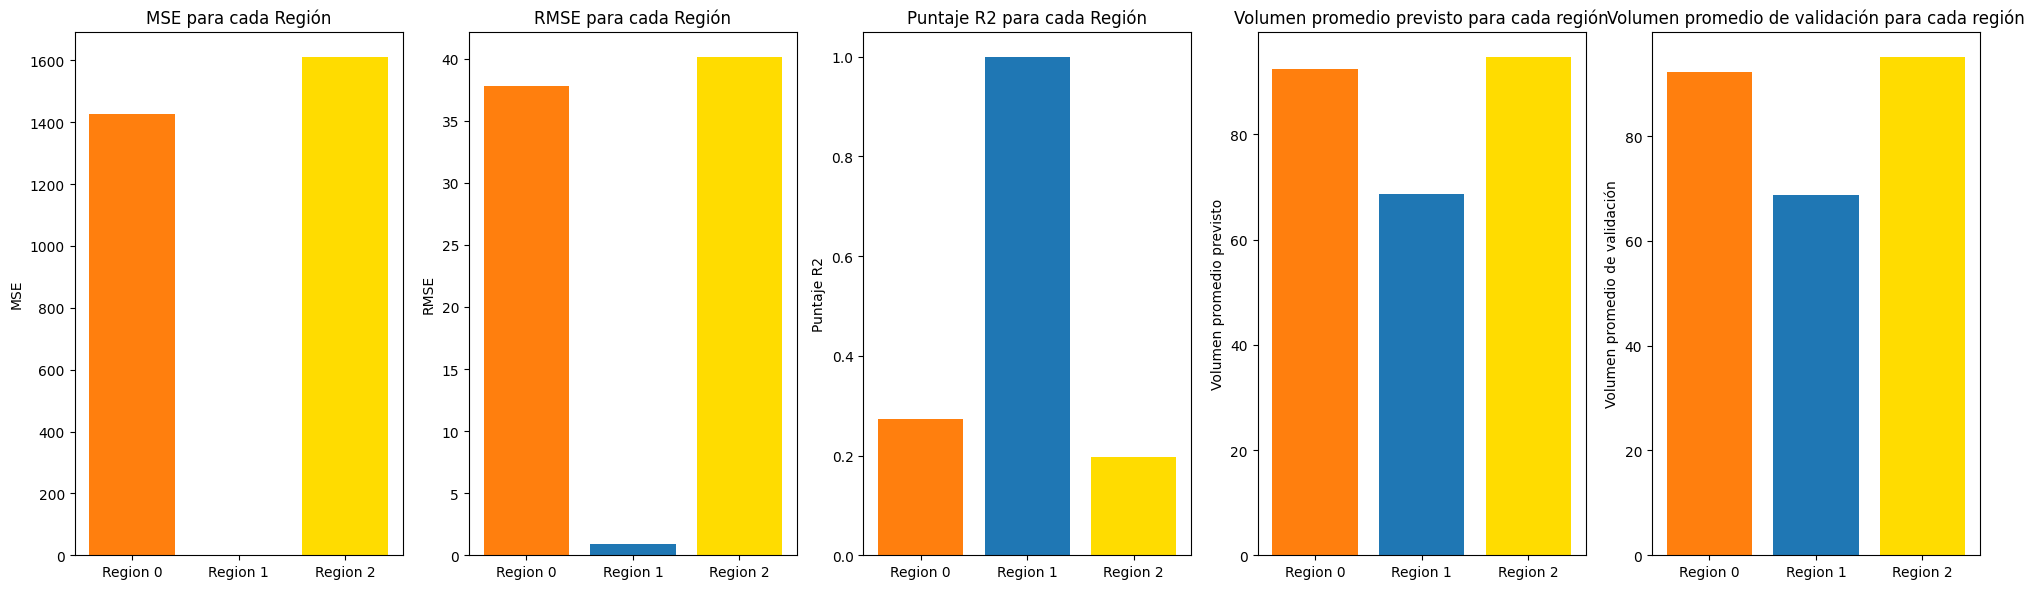

In [37]:
mse_values = [mse_lr_0, mse_lr_1, mse_lr_2]
rmse_values = [rmse_lr_0, rmse_lr_1, rmse_lr_2]
r2_values = [r2_lr_0, r2_lr_1, r2_lr_2]

predicted_volumes = [average_predicted_volume_0, average_predicted_volume_1, average_predicted_volume_2]
validation_volumes = [average_validation_volume_0, average_validation_volume_1, average_validation_volume_2]

fig, axs = plt.subplots(1, 5, figsize=(20, 6))

axs[0].bar(range(3), mse_values, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[0].set_xticks(range(3))
axs[0].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[0].set_ylabel('MSE')
axs[0].set_title('MSE para cada Región')

axs[1].bar(range(3), rmse_values, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[1].set_xticks(range(3))
axs[1].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[1].set_ylabel('RMSE')
axs[1].set_title('RMSE para cada Región')

axs[2].bar(range(3), r2_values, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[2].set_xticks(range(3))
axs[2].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[2].set_ylabel('Puntaje R2')
axs[2].set_title('Puntaje R2 para cada Región')

axs[3].bar(range(3), predicted_volumes, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[3].set_xticks(range(3))
axs[3].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[3].set_ylabel('Volumen promedio previsto')
axs[3].set_title('Volumen promedio previsto para cada región')

axs[4].bar(range(3), validation_volumes, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[4].set_xticks(range(3))
axs[4].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[4].set_ylabel('Volumen promedio de validación')
axs[4].set_title('Volumen promedio de validación para cada región')

plt.tight_layout()
plt.show()

Luego de evaluar los modelos de Regresión Lineal en cada una de las tres regiones se puede analizar los resultados obtenidos ilustrados también con gráficos en los cuales se puede observar que en la Región 0 el modelo presentó un MSE aproximado de 1425.5 y un RMSE de 37.75, la puntuación R2 fue de 0.27 lo cual indica que el modelo no funcinó del todo bien al predecir el volumen de reservas en esta región mientras que el volumen promedio previsto fue 92.39 y el volumen promedio del conjunto de validación fue de 92.32.

En la Región 1 el modelo tuvo un muy buen desempeño con un MSE de 0.79 y un RMSE de 0.89, la puntuación R2 fue de 0.99 lo cual indica que el modelo se ajustaba muy bien a los datos y tiene una gran capacidad para predecir el volumen de reservas mientras que el volumen promedio previsto fue de 68.71 y el volumen promedio del conjunto de validación fue de 68.73.

En la Región 2 el modelo presentó un MSE de 1611.69 y un RMSE de 40.14, la puntuación R2 fue de 0.20, esto indica un desempeño similar al de la Región 0 en la que el modelo tuvo un desempeño no muy acertado en los cálculos del volumen de reservas mientras que el volumen promedio previsto fue de 94.77 y el volumen promedio del conjunto de validación fue de 95.15.

Con base a estos resultados se puede confirmar que el modelo de Regresión Lineal tuvo el mejor desempeño en la Región 1 mostrando una capacidad muy alta para predecir el volumen de reservas.

# Cálculo de ganancias

Antes de calcular el beneficio voy a almacenar los valores necesarios para los cálculos considerando los siguientes valores:

El número total de puntos analizados es de 500.

Seleccionaré los 200 puntos principales para calcular la ganancia.

El presupuesto disponible para el desarrollo de los 200 pozos petroleros más importantes es de 100 millones de dólares. 

Cada unidad del producto tiene un ingreso de 4.500 dólares. 

# Almacenamiento de valores necesarios para los cálculos

In [38]:
analyzed_oilwells = 500

best_oilwells = 200

budget = 100000000

unit_revenue = 4500

# Verificación del volumen de reservas necesarias para desarrollar un nuevo pozo

Para determinar el volumen de petróleo necesario para recuperar el costo de desarrollar un nuevo pozo, dividiré el costo total por la cantidad de pozos considerando el costo total de 100 millones de dólares y los 200 pozos principales.

In [39]:
cost = budget / best_oilwells
print(cost)

500000.0


A continuación calcularé el volumen mínimo requerido para cada pozo, dividiendo el coste del pozo entre los ingresos por unidad del producto:

In [40]:
min_volume = cost / unit_revenue
print(min_volume)

111.11111111111111


El valor anterior representa la cantidad mínima de barriles de petróleo que cada pozo necesita producir para cubrir el costo de desarrollo.

# Gráfico comparativo de la cantidad media de reservas en cada región

En el siguiente paso haré una gráfica comparativa del volumen promedio por región en donde una línea horizontal representa el volumen mínimo necesario para cubrir el costo de desarrollar un pozo (111,11 barriles).

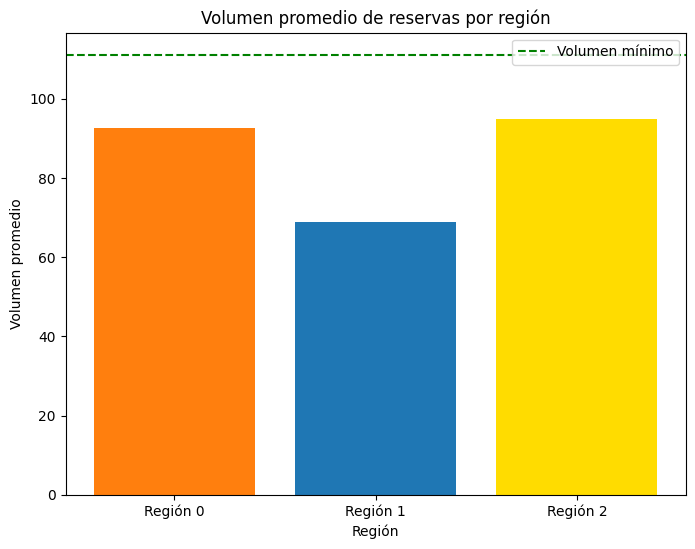

In [41]:
average_volume_region_0 = df0["product"].mean()
average_volume_region_1 = df1["product"].mean()
average_volume_region_2 = df2["product"].mean()

colors = ['#FF7F0E', '#1F77B4', '#FFDC00']

plt.figure(figsize=(8, 6))
plt.bar(["Región 0", "Región 1", "Región 2"], [average_volume_region_0, average_volume_region_1, average_volume_region_2], color=colors)
plt.axhline(y=min_volume, color='green', linestyle='--', label='Volumen mínimo')
plt.xlabel('Región')
plt.ylabel('Volumen promedio')
plt.title('Volumen promedio de reservas por región')
plt.legend()
plt.show()

Al observar el gráfico se puede notar que todas las regiones tienen promedios de volumen por debajo del valor mínimo requerido, esto significa que por el momento la inversión en exploración petrolera en estas regiones puede resultar en pérdidas al principio ya que el volumen promedio de reservas no es suficiente para cubrir el costo de desarrollar un nuevo pozo según los resultados.

# Cálculo de beneficios de pozos petroleros

In [42]:
def revenue(df_target, predictions):

    
    predictions = pd.Series(predictions)

    df_target = df_target.reset_index(drop=True)

    predictions_sorted = predictions.sort_values(ascending=False)

    selected_targets = df_target[predictions_sorted.index][:best_oilwells]

    revenue_generated = (selected_targets.sum() * unit_revenue) - (cost * best_oilwells)

    return revenue_generated

In [43]:
revenue_region_0 = revenue(df0_target_valid, predictions_lr_0)
revenue_region_1 = revenue(df1_target_valid, predictions_lr_1)
revenue_region_2 = revenue(df2_target_valid, predictions_lr_2)

print("Ingresos generados en la Región 0:", revenue_region_0)
print("Ingresos generados en la Región 1:", revenue_region_1)
print("Ingresos generados en la Región 2:", revenue_region_2)

Ingresos generados en la Región 0: 33591411.14462179
Ingresos generados en la Región 1: 24150866.966815114
Ingresos generados en la Región 2: 25985717.59374112


Mediante este código en esta sección se pueden observar los valores de ingresos generados en las diferentes regiones según los 200 pozos principales de cada región indicando el potencial de ganancias y reflejando que al parecer la Región 0 tiene el mayor potencial de ganancias, seguida por la Región 2 y luego la Región 1.

# Cálculo de riesgos y beneficios para cada región

In [44]:
def boot_revenue(df_target, predictions):

     
     df_target = df_target.reset_index(drop=True)

     state = np.random.RandomState(12345)

     values = []

     for i in range(1000):

         df_subsample = df_target.sample(n=analyzed_oilwells, replace=True, random_state=state)

         predictions_subsample = predictions[df_subsample.index]

         revenue_value = revenue(df_subsample, predictions_subsample)

         values.append(revenue_value)

     return pd.Series(values)


revenue_region0 = boot_revenue(df0_target_valid, predictions_lr_0)
revenue_region1 = boot_revenue(df1_target_valid, predictions_lr_1)
revenue_region2 = boot_revenue(df2_target_valid, predictions_lr_2)

def quantile(revenues):
     return np.quantile(revenues, [0.025, 0.975])

def risk(revenues):
     return np.mean(revenues < 0)

confidence_interval_region0 = quantile(revenue_region0)
confidence_interval_region1 = quantile(revenue_region1)
confidence_interval_region2 = quantile(revenue_region2)

risk_of_harm_region0 = risk(revenue_region0)
risk_of_harm_region1 = risk(revenue_region1)
risk_of_harm_region2 = risk(revenue_region2)

region_data = [
     {
         'name': 'Región 0',
         'revenue': revenue_region0,
         'confidence_interval': confidence_interval_region0,
         'risk_of_harm': risk_of_harm_region0
     },
     {
         'name': 'Región 1',
         'revenue': revenue_region1,
         'confidence_interval': confidence_interval_region1,
         'risk_of_harm': risk_of_harm_region1
     },
     {
         'name': 'Región 2',
         'revenue': revenue_region2,
         'confidence_interval': confidence_interval_region2,
         'risk_of_harm': risk_of_harm_region2
     },
]

for data in region_data:
     print(f'{data["name"]}')
     print(f'Beneficio promedio: {data["revenue"].mean()}')
     print(f'Intervalo de confianza 95%: {data["confidence_interval"]}')
     print(f'Riesgo de perdida: {data["risk_of_harm"]}\n')

Región 0
Beneficio promedio: 4062787.8342441902
Intervalo de confianza 95%: [-1177421.36494869  9117370.50751404]
Riesgo de perdida: 0.067

Región 1
Beneficio promedio: 4326241.318131374
Intervalo de confianza 95%: [ 168461.74932431 8159725.26285752]
Riesgo de perdida: 0.019

Región 2
Beneficio promedio: 3773621.924229164
Intervalo de confianza 95%: [-1707804.17705727  9017721.31386445]
Riesgo de perdida: 0.074



En este código usé la función boot_revenue para usar la técnica de bootstrapping que es responsable de iniciar y calcular los ingresos para cada región, luego las funciones quantile y de risk se utilizan para calcular el intervalo de confianza y el riesgo de pérdida respectivamente y al final se imprimen los resultados para cada región, mostrando la ganancia media, el intervalo de confianza del 95% y el riesgo de pérdida.

Después de analizar los resultados se puede observar que la Región 1 tiene la ganancia promedio más alta y el menor riesgo de pérdida entre las tres regiones analizadas por lo tanto, desde mi punto de vista  y en base a los resultados obtenidos debe considerarse esta región para el desarrollo de pozos petroleros, ya que tiene un buen potencial de retorno financiero y menor riesgo de pérdida.

# Conclusión

A través de este trabajo se trató de dar solución a los requerimientos que nos planteó la empresa OilyGiant para lograr el objetivo de encontrar la mejor región para excavar 200 pozos petroleros nuevos llegando a la conclusión de que la mejor región para hacerlo era la región 1 ya que a pesar de que en un principio parecían mas atractivas y con mejores características para lograr ganancias las regiones 0 Y 2 Al final después de un análisis exhaustivo se logró ver mediante los resultados que la mejor región era la 1 ya que tuvo la ganancia promedio más alta y el menor riesgo de perdida, por lo tanto es la más confiable.
